## Summarize the history of Mooring Site (M8)

- mooring data pulled from ERDDAP (preliminary and/or final)   
- currently on akutan


In [1]:
from erddapy import ERDDAP
import pandas as pd
import numpy as np
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter

import cmocean

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker

import cmocean
### specify primary bulk figure parameters
fontsize = 10
labelsize = 10
#plotstyle = 'seaborn'
max_xticks = 10
plt.style.use('seaborn-ticks')
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['ps.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['pdf.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.minor.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 0.5
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['ytick.minor.size'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 0.5
mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['xtick.color'] = 'black'
# mpl.rcParams['pcolor.shading']

In [3]:
server_url = 'http://akutan.pmel.noaa.gov:8080/erddap'

Lets find all erddap datasets that would be associated with M8:   


In [16]:
e = ERDDAP(server=server_url)
dfall = pd.read_csv(e.get_search_url(response='csv', search_for='bs8'))

print(dfall['Dataset ID'].values)

['1hr_gridded_datasets_Mooring_05bs8a_final'
 '1hr_gridded_datasets_Mooring_05bs8b_final'
 '1hr_gridded_datasets_Mooring_06bs8a_final'
 '1hr_gridded_datasets_Mooring_07bs8a_final'
 '1hr_gridded_datasets_Mooring_08bs8a_final'
 '1hr_gridded_datasets_Mooring_09bs8a_final'
 '1hr_gridded_datasets_Mooring_10bs8a_final'
 '1hr_gridded_datasets_Mooring_11bs8a_final'
 '1hr_gridded_datasets_Mooring_12bs8a_final'
 '1hr_gridded_datasets_Mooring_13bs8a_final'
 '1hr_gridded_datasets_Mooring_14bs8a_final'
 '1hr_gridded_datasets_Mooring_15bs8a_final'
 '1hr_gridded_datasets_Mooring_16bs8a_final'
 '1hr_gridded_datasets_Mooring_17bs8a_final'
 '1hr_gridded_datasets_Mooring_18bs8a_final'
 'datasets_Mooring_05bs8a_final' 'datasets_Mooring_05bs8b_final'
 'datasets_Mooring_06bs8a_final' 'datasets_Mooring_07bs8a_final'
 'datasets_Mooring_08bs8a_final' 'datasets_Mooring_09bs8a_final'
 'datasets_Mooring_10bs8a_final' 'datasets_Mooring_11bs8a_final'
 'datasets_Mooring_12bs8a_final' 'datasets_Mooring_13bs8a_final'


In [6]:
from requests.exceptions import HTTPError

dfs = {}
for dataset_id in dfall['Dataset ID'].values:
    print(dataset_id)
    try:
        d = ERDDAP(server=server_url,
            protocol='tabledap',
            response='csv'
        )
        d.dataset_id=dataset_id
    except HTTPError:
        print('Failed to generate url {}'.format(dataset_id))

    try:
        df_m = d.to_pandas(
                    index_col='time (UTC)',
                    parse_dates=True,
                    skiprows=(1,)  # units information can be dropped.
                    )
        df_m.sort_index(inplace=True)
        df_m.columns = [x[1].split()[0] for x in enumerate(df_m.columns)]
        
        #-9999 and 1e35 are missing values... but erddap doesn't catch the -9999 yet 
        #and some 1e35 are off a bit
        df_m['depth'][(df_m.depth == -9999)] = np.nan # only in pressure field
        dfs.update({dataset_id:df_m})
    except:
        pass


1hr_gridded_datasets_Mooring_05bs8a_final
1hr_gridded_datasets_Mooring_06bs8a_final
1hr_gridded_datasets_Mooring_07bs8a_final
1hr_gridded_datasets_Mooring_08bs8a_final
1hr_gridded_datasets_Mooring_09bs8a_final
1hr_gridded_datasets_Mooring_10bs8a_final
1hr_gridded_datasets_Mooring_11bs8a_final
1hr_gridded_datasets_Mooring_12bs8a_final
1hr_gridded_datasets_Mooring_16bs8a_final
1hr_gridded_datasets_Mooring_18bs8a_final
datasets_Mooring_05bs8a_final


/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_44224/265467865.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['depth'][(df_m.depth == -9999)] = np.nan # only in pressure field


datasets_Mooring_05bs8b_final


/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_44224/265467865.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['depth'][(df_m.depth == -9999)] = np.nan # only in pressure field


datasets_Mooring_06bs8a_final


/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_44224/265467865.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['depth'][(df_m.depth == -9999)] = np.nan # only in pressure field


datasets_Mooring_07bs8a_final


/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_44224/265467865.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['depth'][(df_m.depth == -9999)] = np.nan # only in pressure field


datasets_Mooring_08bs8a_final


/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_44224/265467865.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['depth'][(df_m.depth == -9999)] = np.nan # only in pressure field


datasets_Mooring_09bs8a_final


/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_44224/265467865.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['depth'][(df_m.depth == -9999)] = np.nan # only in pressure field


datasets_Mooring_10bs8a_final


/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_44224/265467865.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['depth'][(df_m.depth == -9999)] = np.nan # only in pressure field


datasets_Mooring_11bs8a_final


/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_44224/265467865.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['depth'][(df_m.depth == -9999)] = np.nan # only in pressure field


datasets_Mooring_12bs8a_final


/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_44224/265467865.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['depth'][(df_m.depth == -9999)] = np.nan # only in pressure field


datasets_Mooring_13bs8a_final


/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_44224/265467865.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['depth'][(df_m.depth == -9999)] = np.nan # only in pressure field


datasets_Mooring_14bs8a_final


/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_44224/265467865.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['depth'][(df_m.depth == -9999)] = np.nan # only in pressure field


datasets_Mooring_15bs8a_final


/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_44224/265467865.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['depth'][(df_m.depth == -9999)] = np.nan # only in pressure field


datasets_Mooring_16bs8a_final


/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_44224/265467865.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['depth'][(df_m.depth == -9999)] = np.nan # only in pressure field


datasets_Mooring_17bs8a_final


/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_44224/265467865.py:16: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  df_m = d.to_pandas(
/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_44224/265467865.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['depth'][(df_m.depth == -9999)] = np.nan # only in pressure field


datasets_Mooring_18bs8a_final


/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_44224/265467865.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['depth'][(df_m.depth == -9999)] = np.nan # only in pressure field


datasets_Mooring_14bs8a_preliminary


/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_44224/265467865.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['depth'][(df_m.depth == -9999)] = np.nan # only in pressure field


datasets_Mooring_15bs8a_preliminary


/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_44224/265467865.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['depth'][(df_m.depth == -9999)] = np.nan # only in pressure field


datasets_Mooring_16bs8a_preliminary


/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_44224/265467865.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['depth'][(df_m.depth == -9999)] = np.nan # only in pressure field


datasets_Mooring_17bs8a_preliminary


/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_44224/265467865.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['depth'][(df_m.depth == -9999)] = np.nan # only in pressure field


datasets_Mooring_18bs8a_preliminary


/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_44224/265467865.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['depth'][(df_m.depth == -9999)] = np.nan # only in pressure field


datasets_Mooring_05bs8a_final:74
datasets_Mooring_05bs8b_final:366
datasets_Mooring_06bs8a_final:356
datasets_Mooring_07bs8a_final:345
datasets_Mooring_08bs8a_final:395
datasets_Mooring_09bs8a_final:362
datasets_Mooring_10bs8a_final:319
datasets_Mooring_11bs8a_final:361
datasets_Mooring_12bs8a_final:372
datasets_Mooring_13bs8a_final:422
datasets_Mooring_14bs8a_final:465
datasets_Mooring_15bs8a_final:366
datasets_Mooring_16bs8a_final:363
datasets_Mooring_17bs8a_final:376
datasets_Mooring_18bs8a_final:346


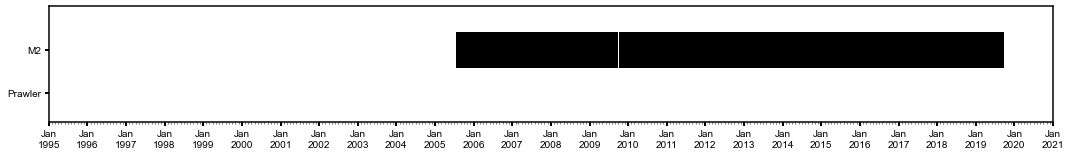

In [7]:
fig = plt.figure(1,figsize=(18,2.125))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)
for dfn, df in dfs.items():
    if 'final' in dfn:
        offset = 0
        duration = (df.last('s').index[0]-df.first('s').index[0]).days
        print(f"{dfn}:{duration}")
        ax1.barh(offset,duration,.125,left=df.first('s').index[0].to_pydatetime(),
                 color='k',label=dfn) #inital 
    elif 'erddap' in dfn:
        offset = -.15
        df = df[~df.index.isnull()]
        duration = (df.last('s').index[0]-df.first('s').index[0]).days
        print(f"{dfn}:{duration}")
        ax1.barh(offset,duration,.125,left=df.first('s').index[0].to_pydatetime(),
                 color='g',label=dfn) #inital 
            
xfmt = mdates.DateFormatter('%b\n%Y')
ax1.xaxis.set_major_formatter(xfmt)
#ax1.set_xlim([datetime.date(1995,1,1),datetime.date.today()])
ax1.set_xlim([datetime.date(1995,1,1),datetime.date(2021,1,1)])
ax1.set_ylim([-.25,.15])
plt.yticks([0,-.15],['M2','Prawler'])

ax1.xaxis.set_major_locator(YearLocator())
ax1.xaxis.set_minor_locator(MonthLocator())

In [11]:
df.columns

Index(['depth', 'latitude', 'longitude', 'temperature', 'pressure', 'salinity',
       'PAR', 'Chlorophyll_Fluorescence', 'Oxygen_Saturation',
       'Oxygen_Concentration', 'timeseries_id', 'Instrument_Identifier',
       'Serial_Number'],
      dtype='object')

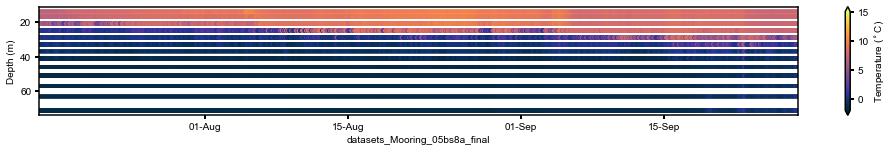

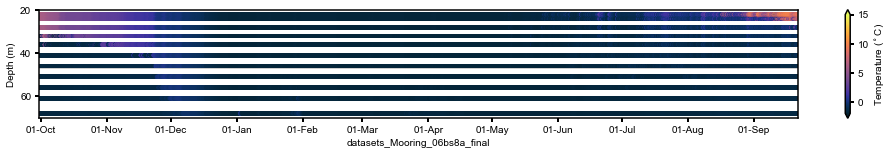

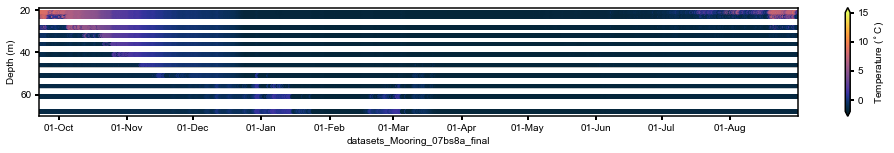

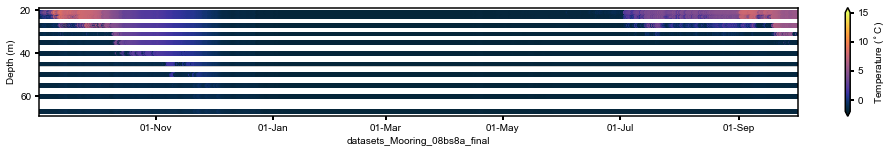

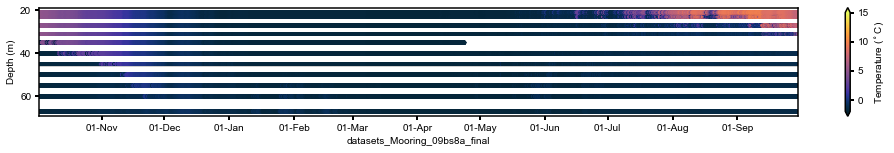

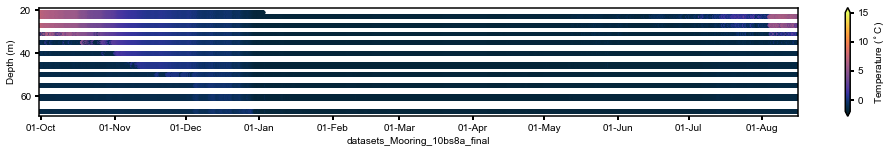

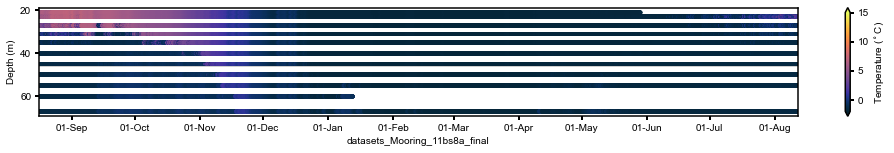

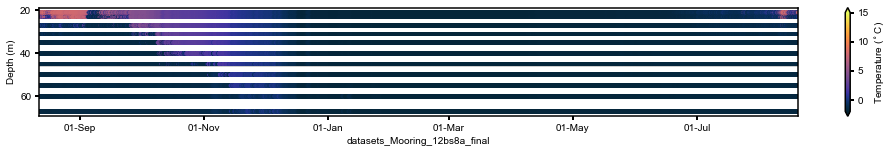

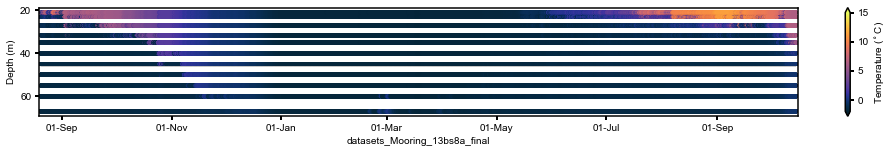

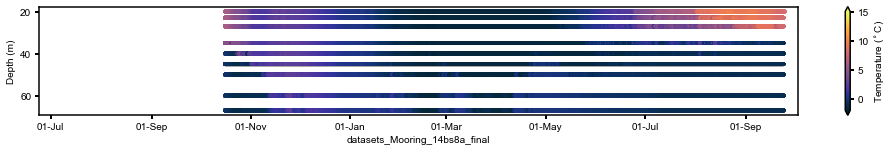

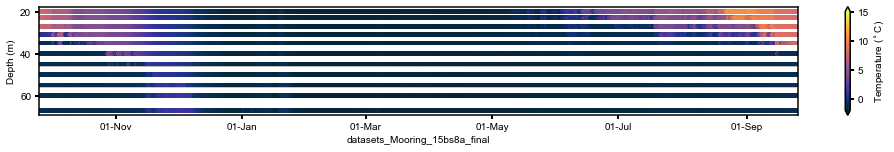

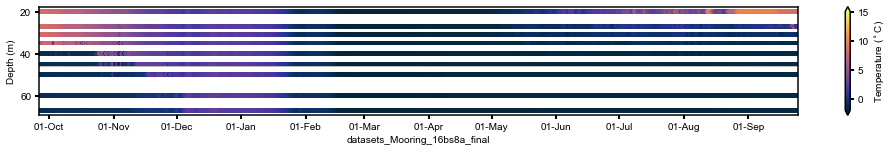

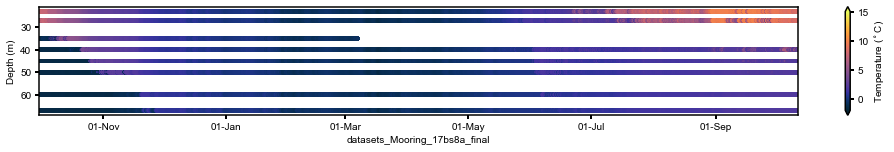

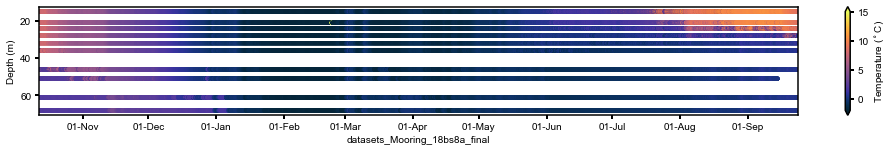

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cmocean

for dfn, df in dfs.items():
    if 'final' in dfn:
        fig, ax = plt.subplots(figsize=(17, 2))
        cs = ax.scatter(df.index, df['depth'], s=15, c=df['temperature'], 
                        marker='o', edgecolor='none', vmin=-2, vmax=15, cmap=cmocean.cm.thermal)

        ax.invert_yaxis()
        try:
            ax.set_xlim(df.index[0], df.index[-1])
        except:
            pass
        
        xfmt = mdates.DateFormatter('%d-%b')
        ax.xaxis.set_major_formatter(xfmt)

        cbar = fig.colorbar(cs, orientation='vertical', extend='both')
        cbar.ax.set_ylabel('Temperature ($^\circ$C)')
        ax.set_ylabel('Depth (m)')
        ax.set_xlabel(dfn)

        #fig.savefig(dfn+'.png',dpi=300)


datasets_Mooring_05bs8a_final
datasets_Mooring_06bs8a_final
datasets_Mooring_07bs8a_final
datasets_Mooring_08bs8a_final
datasets_Mooring_09bs8a_final
datasets_Mooring_10bs8a_final
datasets_Mooring_11bs8a_final
datasets_Mooring_12bs8a_final
datasets_Mooring_13bs8a_final
datasets_Mooring_14bs8a_final
datasets_Mooring_15bs8a_final
datasets_Mooring_16bs8a_final
datasets_Mooring_17bs8a_final
datasets_Mooring_18bs8a_final


Text(0, 0.5, 'Depth (m)')

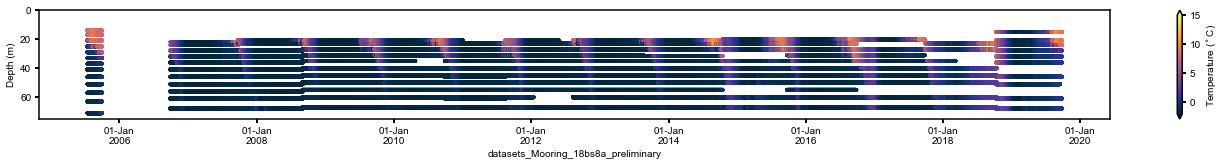

In [14]:
fig, ax = plt.subplots(figsize=(24, 2))

for dfn, df in dfs.items():
    if ('final' in dfn):
        print(dfn)
        try:
            cs = ax.scatter(df.index, df['depth'], s=15, c=df['temperature'], 
                        marker='o', edgecolor='none', vmin=-2, vmax=15, cmap=cmocean.cm.thermal)
        except:
            pass
        
    ax.set_ylim([0,75])
    ax.invert_yaxis()
    #ax.set_xlim(df.index[0], df.index[-1])
    xfmt = mdates.DateFormatter('%d-%b\n%Y')
    ax.xaxis.set_major_formatter(xfmt)
    ax.set_xlabel(dfn)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Temperature ($^\circ$C)')
ax.set_ylabel('Depth (m)')



datasets_Mooring_05bs8a_final
datasets_Mooring_05bs8b_final
datasets_Mooring_06bs8a_final
datasets_Mooring_07bs8a_final
datasets_Mooring_08bs8a_final


/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_44224/115844672.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[parameter][df[parameter] >= 1e34] = np.nan
/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_44224/115844672.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[parameter][df[parameter] >= 1e34] = np.nan
/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_44224/115844672.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

datasets_Mooring_09bs8a_final
datasets_Mooring_10bs8a_final
datasets_Mooring_11bs8a_final
datasets_Mooring_12bs8a_final
datasets_Mooring_13bs8a_final


/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_44224/115844672.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[parameter][df[parameter] >= 1e34] = np.nan
/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_44224/115844672.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[parameter][df[parameter] >= 1e34] = np.nan
/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_44224/115844672.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

datasets_Mooring_14bs8a_final
datasets_Mooring_15bs8a_final
datasets_Mooring_16bs8a_final
datasets_Mooring_18bs8a_final


/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_44224/115844672.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[parameter][df[parameter] >= 1e34] = np.nan
/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_44224/115844672.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[parameter][df[parameter] >= 1e34] = np.nan
/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_44224/115844672.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

Text(0, 0.5, 'Depth (m)')

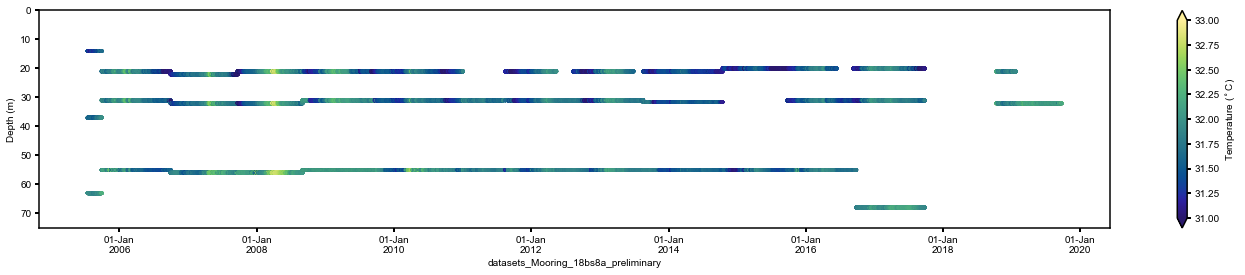

In [21]:
fig, ax = plt.subplots(figsize=(24, 4))
parameter = 'salinity'
for dfn, df in dfs.items():
    if ('final' in dfn) and (not np.isnan(df['salinity']).all()):
        print(dfn)
        df[parameter][df[parameter] >= 1e34] = np.nan
        try:
            cs = ax.scatter(df.index, df['depth'], s=15, c=df[parameter], 
                        marker='o', edgecolor='none', vmin=31, vmax=33, cmap=cmocean.cm.haline)
        except:
            pass

    ax.set_ylim([0,75])
    ax.invert_yaxis()
    #ax.set_xlim(df.index[0], df.index[-1])
    xfmt = mdates.DateFormatter('%d-%b\n%Y')
    ax.xaxis.set_major_formatter(xfmt)
    ax.set_xlabel(dfn)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Temperature ($^\circ$C)')
ax.set_ylabel('Depth (m)')



## Use xarray for gridded data (image and convert to csv)

1hr_gridded_datasets_Mooring_05bs8a_final
1hr_gridded_datasets_Mooring_05bs8b_final
1hr_gridded_datasets_Mooring_06bs8a_final
1hr_gridded_datasets_Mooring_07bs8a_final
1hr_gridded_datasets_Mooring_08bs8a_final
1hr_gridded_datasets_Mooring_09bs8a_final
1hr_gridded_datasets_Mooring_10bs8a_final
1hr_gridded_datasets_Mooring_11bs8a_final
1hr_gridded_datasets_Mooring_12bs8a_final
1hr_gridded_datasets_Mooring_13bs8a_final
1hr_gridded_datasets_Mooring_14bs8a_final
1hr_gridded_datasets_Mooring_15bs8a_final
1hr_gridded_datasets_Mooring_16bs8a_final
1hr_gridded_datasets_Mooring_17bs8a_final
1hr_gridded_datasets_Mooring_18bs8a_final


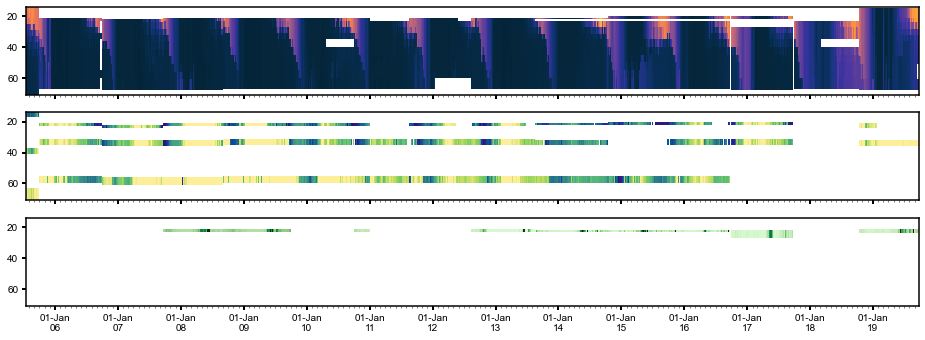

In [30]:
import warnings
warnings.filterwarnings('ignore')

fig, (ax1, ax3, ax4) = plt.subplots(nrows=3, sharex=True, figsize=(16,5.5))

for dataset_id in dfall['Dataset ID'].values:
    if ('gridded' in dataset_id):
        print(dataset_id)
        
        e.protocol = 'griddap'
        e.dataset_id=dataset_id
        e.response = 'ncCF'
        ds = e.to_xarray(decode_times=True)
        

        ax1.pcolormesh(ds.time,ds.depth,ds.temperature,
                       vmin=-2,vmax=14,
                       cmap=cmocean.cm.thermal)
        ax3.pcolormesh(ds.time,ds.depth,ds.salinity,
                       vmin=31,vmax=32,
                       cmap=cmocean.cm.haline)
        ax4.pcolormesh(ds.time,ds.depth,ds.Chlorophyll_Fluorescence,
                       vmin=0,vmax=20,
                       cmap=cmocean.cm.algae)


ax1.invert_yaxis()
ax3.invert_yaxis()
ax4.invert_yaxis()

xfmt = mdates.DateFormatter('%d-%b\n%y')
ax4.xaxis.set_major_formatter(xfmt)
ax4.xaxis.set_major_locator(YearLocator())
ax4.xaxis.set_minor_locator(MonthLocator())

In [77]:
df_mooring = pd.DataFrame()

for dataset_id in dfall['Dataset ID'].values:
    if ('gridded' in dataset_id):
        print(dataset_id)
        
        e.protocol = 'griddap'
        e.dataset_id=dataset_id
        e.variables = ['latitude',
                       'longitude',
                       'temperature',
                       'pressure',
                       'salinity',
                       'Chlorophyll_Fluorescence']
        e.response = 'ncCF'
        ds = e.to_xarray(decode_times=True)
        
        df_mooring = pd.concat([df_mooring, ds.to_dataframe(dim_order=['time','depth'])])
        
        (ds.temperature.to_dataframe(dim_order=['time','depth']).reset_index()).pivot(index='time', columns='depth', values='temperature').to_csv(dataset_id+'.csv')

df_mooring.temperature.to_csv('M8_entirerecord_1hr_gridded'+'.csv')

1hr_gridded_datasets_Mooring_05bs8a_final
1hr_gridded_datasets_Mooring_05bs8b_final
1hr_gridded_datasets_Mooring_06bs8a_final
1hr_gridded_datasets_Mooring_07bs8a_final
1hr_gridded_datasets_Mooring_08bs8a_final
1hr_gridded_datasets_Mooring_09bs8a_final
1hr_gridded_datasets_Mooring_10bs8a_final
1hr_gridded_datasets_Mooring_11bs8a_final
1hr_gridded_datasets_Mooring_12bs8a_final
1hr_gridded_datasets_Mooring_13bs8a_final
1hr_gridded_datasets_Mooring_14bs8a_final
1hr_gridded_datasets_Mooring_15bs8a_final
1hr_gridded_datasets_Mooring_16bs8a_final
1hr_gridded_datasets_Mooring_17bs8a_final
1hr_gridded_datasets_Mooring_18bs8a_final
